# Wheat Variety Classification


## 1. Problem Statement

Can we predict the verity of wheat using clustering technique with the attributes like geometrical properties?

## 2. Data

Measurements of geometrical properties of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment.

Read more on it in the website:
http://archive.ics.uci.edu/ml/datasets/seeds

## 3. Evaluation

Use clustering algorithm (K-means, etc.) to develop a CLUSTERING model to predict the variety of wheat.

## 4. Features

**Data Dictionary**
1. area A,
2. perimeter P,
3. compactness C = 4piA/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove. 

All of these parameters were real-valued continuous.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [147]:
# load data
wheat_data = pd.read_csv("drive/MyDrive/Colab Notebooks/seeds_dataset.csv")
wheat_data.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,kernel_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [148]:
wheat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             210 non-null    float64
 1   perimeter        210 non-null    float64
 2   compactness      210 non-null    float64
 3   length           210 non-null    float64
 4   width            210 non-null    float64
 5   asymmetry_coeff  210 non-null    float64
 6   groove_length    210 non-null    float64
 7   kernel_type      210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [149]:
# set up the training and test data
X = wheat_data.drop(["kernel_type"], axis=1)

In [150]:
# since we already know the number of varieties that are there in the data, k = 3 
# instantiate the KMeans class with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=29)

# fit the data and predict the set with test set y
y_preds = kmeans.fit_predict(X)

In [151]:
y_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [152]:
# get the unique values of labels from the predicted values
unique_labels = np.unique(y_preds)
unique_labels

array([0, 1, 2], dtype=int32)

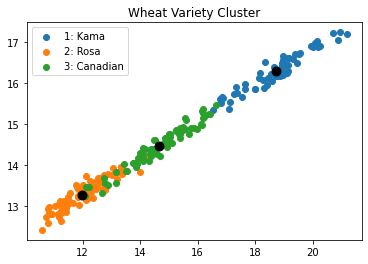

In [154]:
# get the centroids for the three clusters
centroids = kmeans.cluster_centers_

# plotting the results
for i in unique_labels:
    plt.scatter(X.values[y_preds == i, 0] , X.values[y_preds == i , 1])
plt.legend(["1: Kama", "2: Rosa", "3: Canadian" ])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title("Wheat Variety Cluster")
plt.show()

## Clustering Evaluation

In [173]:
y_truth = wheat_data["kernel_type"]
score = metrics.adjusted_rand_score(y_preds, y_truth)

print(f"The scoring of the prediction of the model: {score*100: 0.2f}%") 

The accuracy of the model:  71.66%


## Conclusion

The KMeans model predicts the values with 71.66% accuracy.

More work to be done to bring the accuracy up by hyperparameter tuning. Or maybe use multi-class classification algorithm.
